### Why perform EDA?

- **Detecting patters and relationships**  
- **Generatin quesitons, or HYPOTHESES**  
- **Preparing data for machine learning**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

salaries = pd.read_csv('datasets/ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [5]:

salaries['Designation'].value_counts(normalize = True)

Designation
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager          

In [8]:
pd.crosstab(salaries['Designation'], salaries['Experience'])

Experience,Entry,Executive,Mid,Senior
Designation,,,,
3D Computer Vision Researcher,0,0,1,0
AI Scientist,4,0,2,1
Analytics Engineer,0,2,0,2
Applied Data Scientist,1,0,2,2
Applied Machine Learning Scientist,1,0,3,0
BI Data Analyst,2,1,3,0
Big Data Architect,0,0,0,1
Big Data Engineer,3,0,3,2
Business Data Analyst,2,0,3,0


In [12]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Designation"], salaries["Company_Size"], values = salaries['Salary_USD'], aggfunc='mean' ))

Company_Size                                          L              M  \
Designation                                                              
3D Computer Vision Researcher                       NaN    5165.000000   
AI Scientist                              121741.500000   63019.000000   
Analytics Engineer                                  NaN  167096.000000   
Applied Data Scientist                    167721.400000            NaN   
Applied Machine Learning Scientist        237754.000000   33550.500000   
BI Data Analyst                            88923.000000   94528.500000   
Big Data Architect                                  NaN   95200.000000   
Big Data Engineer                          27384.750000   80695.000000   
Business Data Analyst                      87132.000000   17609.000000   
Cloud Data Engineer                        85261.000000            NaN   
Computer Vision Engineer                            NaN   42467.750000   
Computer Vision Software Engineer     

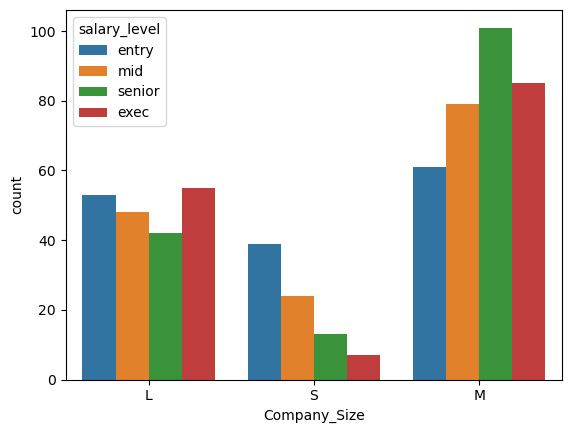

In [15]:
twenty_fifht = salaries['Salary_USD'].quantile(0.25)
median = salaries['Salary_USD'].median()
seventy_fifth = salaries['Salary_USD'].quantile(0.75)

salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifht, median, seventy_fifth, salaries["Salary_USD"].max()]


# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                    bins=salary_ranges,
                                    labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

In [17]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,salary_level
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,mid
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,exec
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,senior
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,entry
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,senior
